# Chap01 - 한눈에 보는 머신러닝

## 1.3 머신러닝 시스템의 종류

### 1.3.3 사례 기반 하습과 모델 기반 학습

#### 예제 1-1. 사이킷런을 이용한 선형 모델의 훈련과 실행

In [1]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
datapath = os.path.join("../datasets", "lifesat", "")

In [4]:
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


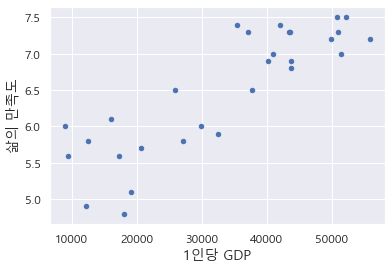

In [5]:
# Data load
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', 
                             delimiter='\t', encoding='latin1', na_values='n/a')

# Data prepare
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Data visualization
ax = country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
ax.set(xlabel='1인당 GDP', ylabel='삶의 만족도')
plt.show()

In [6]:
# Linear Regression
model = sklearn.linear_model.LinearRegression()

# Model train
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 결과 [[ 5.96242338]]

[[5.96242338]]


In [7]:
# 선형 회귀 모델을 k-최근접 이웃 회귀 모델로 교체할 경우
### sklearn.neighbors not working @20200306
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델 훈련
knn.fit(X, y)

# 키프로스에 대한 예측
print(knn.predict(X_new)) # 결과 [[ 5.76666667]]

[[5.76666667]]
